<a href="https://colab.research.google.com/github/m1328/sudoku-solver/blob/main/SUDOKU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

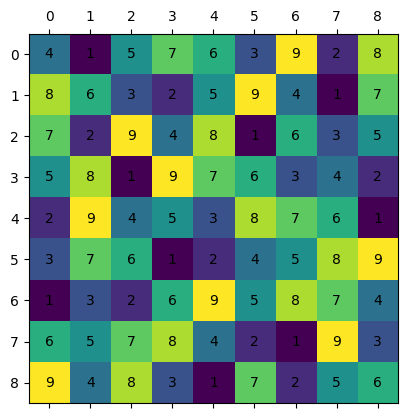

[[4 1 5 7 6 3 9 2 8]
 [8 6 3 2 5 9 4 1 7]
 [7 2 9 4 8 1 6 3 5]
 [5 8 1 9 7 6 3 4 2]
 [2 9 4 5 3 8 7 6 1]
 [3 7 6 1 2 4 5 8 9]
 [1 3 2 6 9 5 8 7 4]
 [6 5 7 8 4 2 1 9 3]
 [9 4 8 3 1 7 2 5 6]]
Czas: 1.3566677570343018 sekund


In [ ]:
#z przykładową tablicą
import numpy as np
import matplotlib.pyplot as plt
import time

sudoku = [[0, 0, 0, 0, 0, 0, 0, 2, 8],
          [0, 6, 0, 0, 0, 0, 0, 0, 7],
          [0, 0, 0, 4, 0, 1, 0, 0, 0],
          [5, 0, 0, 9, 7, 0, 3, 0, 0],
          [2, 0, 4, 0, 0, 8, 0, 0, 0],
          [3, 0, 0, 0, 0, 4, 5, 0, 0],
          [1, 3, 0, 0, 9, 0, 0, 0, 0],
          [0, 5, 7, 0, 0, 0, 0, 9, 0],
          [0, 0, 8, 3, 1, 7, 0, 0, 0]]

def poprawne(row, col, value):
    global sudoku
    for i in range(0, 9):
        if sudoku[row][i] == value:
            return False
    for i in range(0, 9):
        if sudoku[i][col] == value:
            return False
    x_start = (col // 3) * 3
    y_start = (row // 3) * 3
    for i in range(0, 3):
        for j in range(0, 3):
            if sudoku[y_start + i][x_start + j] == value:
                return False
    return True

def iteracja():
    global sudoku
    for i in range(0, 9):
        for j in range(0, 9):
            if sudoku[i][j] == 0:
                for num in range(1, 10):
                    if poprawne(i, j, num):
                        sudoku[i][j] = num
                        iteracja()
                        sudoku[i][j] = 0

                return

    fig, ax = plt.subplots()
    ax.matshow(np.array(sudoku), cmap='viridis', interpolation='nearest')

    for i in range(9):
        for j in range(9):
            num = sudoku[i][j]
            if num != 0:
                ax.text(j, i, str(num), va='center', ha='center')

    plt.show()

    print(np.matrix(sudoku))

start_time = time.time()
iteracja()
end_time = time.time()
print("Czas:", end_time - start_time, "sekund")


Wpisz tablicę sudoku, którą chcesz rozwiązać (wiersz po wierszu, użyj 0 dla pustych okienek):
0 0 0 0 0 0 0 2 8
0 6 0 0 0 0 0 0 7
0 0 0 4 0 1 0 0 0
5 0 0 9 7 0 3 0 0
2 0 4 0 0 8 0 0 0
3 0 0 0 0 4 5 0 0
1 3 0 0 9 0 0 0 0
0 5 7 0 0 0 0 9 0
0 0 8 3 1 7 0 0 0


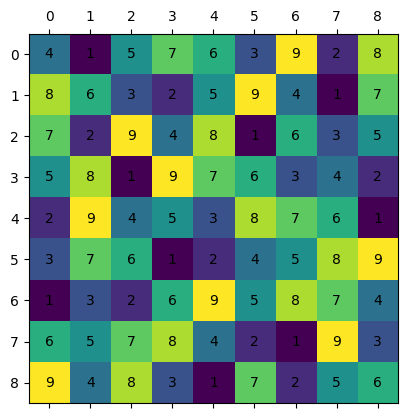

[[4 1 5 7 6 3 9 2 8]
 [8 6 3 2 5 9 4 1 7]
 [7 2 9 4 8 1 6 3 5]
 [5 8 1 9 7 6 3 4 2]
 [2 9 4 5 3 8 7 6 1]
 [3 7 6 1 2 4 5 8 9]
 [1 3 2 6 9 5 8 7 4]
 [6 5 7 8 4 2 1 9 3]
 [9 4 8 3 1 7 2 5 6]]
Czas: 0.8538048267364502 sekund


In [ ]:
#użytkownik sam wpisuje tablice
import numpy as np
import matplotlib.pyplot as plt
import time

def pobierz_wejście_od_użytkownika():
    print("Wpisz tablicę sudoku, którą chcesz rozwiązać (wiersz po wierszu, użyj 0 dla pustych okienek):")
    sudoku = []
    for _ in range(9):
        wiersz = list(map(int, input().split()))
        sudoku.append(wiersz)
    return sudoku

def poprawne(sudoku, wiersz, kolumna, wartość):
    for i in range(0, 9):
        if sudoku[wiersz][i] == wartość or sudoku[i][kolumna] == wartość:
            return False
    x_start = (kolumna // 3) * 3
    y_start = (wiersz // 3) * 3
    for i in range(0, 3):
        for j in range(0, 3):
            if sudoku[y_start + i][x_start + j] == wartość:
                return False
    return True

def iteracja(sudoku):
    for i in range(0, 9):
        for j in range(0, 9):
            if sudoku[i][j] == 0:
                for num in range(1, 10):
                    if poprawne(sudoku, i, j, num):
                        sudoku[i][j] = num
                        iteracja(sudoku)
                        sudoku[i][j] = 0

                return

    fig, ax = plt.subplots()
    ax.matshow(np.array(sudoku), cmap='viridis', interpolation='nearest')

    for i in range(9):
        for j in range(9):
            num = sudoku[i][j]
            if num != 0:
                ax.text(j, i, str(num), va='center', ha='center')

    plt.show()

    print(np.matrix(sudoku))

użytkownikowe_sudoku = pobierz_wejście_od_użytkownika()

start_time = time.time()
iteracja(użytkownikowe_sudoku)
end_time = time.time()
print("Czas:", end_time - start_time, "sekund")
